In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #modelo random forest y #gradient boosted trees
from sklearn.svm import SVR #support vector regression
from sklearn.linear_model import Ridge,Lasso # regression with regularization: Rigde: is given by the l2-norm. Also known as Ridge Regression
from sklearn.kernel_ridge import KernelRidge #kernel ridge regression
from sklearn import preprocessing # para feature scaling
from sklearn.metrics import mean_squared_error, r2_score #métricas

In [2]:
%matplotlib inline

In [3]:
#import Data por industria
file= 'Dataframe_Importaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.iloc[:,:]

,Pais_vendedor,industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,30303804.0
1,América Latina,Industrias Manufactureras,2000,Febrero,21215828.0
2,América Latina,Industrias Manufactureras,2000,Marzo,31298113.0
3,América Latina,Industrias Manufactureras,2000,Abril,33358374.0
4,América Latina,Industrias Manufactureras,2000,Mayo,67373766.0
5,América Latina,Industrias Manufactureras,2000,Junio,58354363.0
6,América Latina,Industrias Manufactureras,2000,Julio,47566573.0
7,América Latina,Industrias Manufactureras,2000,Agosto,51311091.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,36400806.0
9,América Latina,Industrias Manufactureras,2000,Octubre,50265853.0


In [4]:
datos.Mes=datos.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
datos['Año']=datos['Año'].values.astype(np.float)

In [5]:
#reemplazar numeros de años para modificar que los años comienzen en agosto y terminen en julio, así se harán predicciones
#para el último año "17" siendo este agosto2016-julio2017

rows_toreplace=datos[(datos.Año==2000) & (datos.Mes<8)].index.values # filas a reemplazar año 0(enero2000-julio2000)
datos.loc[rows_toreplace,'Año']=0

for año0,año1,i in zip(range(2000,2017),range(2001,2018),range(1,18)):
    rows_toreplace=datos[(datos.Año==año0) & (datos.Mes>7)].index.values # filas a reemplazar del año (agosto-diciembre)
    datos.loc[rows_toreplace,'Año']=i 
    rows_toreplace=datos[(datos.Año==año1) & (datos.Mes<8)].index.values # filas a reemplazar del año (enero-julio)
    datos.loc[rows_toreplace,'Año']=i

In [6]:
datos

,Pais_vendedor,industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,0.0,1,30303804.0
1,América Latina,Industrias Manufactureras,0.0,2,21215828.0
2,América Latina,Industrias Manufactureras,0.0,3,31298113.0
3,América Latina,Industrias Manufactureras,0.0,4,33358374.0
4,América Latina,Industrias Manufactureras,0.0,5,67373766.0
5,América Latina,Industrias Manufactureras,0.0,6,58354363.0
6,América Latina,Industrias Manufactureras,0.0,7,47566573.0
7,América Latina,Industrias Manufactureras,1.0,8,51311091.0
8,América Latina,Industrias Manufactureras,1.0,9,36400806.0
9,América Latina,Industrias Manufactureras,1.0,10,50265853.0


In [10]:
#agrupar datos para tener datos anuales 0
datos_anuales_0=datos.groupby(['Pais_vendedor','industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_0=datos_anuales_0.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_0.head(30)

,Pais_vendedor,industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,6.079525e+08
1,América Latina,Industrias Manufactureras,2.0,9.898354e+08
2,América Latina,Industrias Manufactureras,3.0,7.444271e+08
3,América Latina,Industrias Manufactureras,4.0,8.148923e+08
4,América Latina,Industrias Manufactureras,5.0,8.692589e+08
5,América Latina,Industrias Manufactureras,6.0,1.165175e+09
6,América Latina,Industrias Manufactureras,7.0,1.649701e+09
7,América Latina,Industrias Manufactureras,8.0,2.044681e+09
8,América Latina,Industrias Manufactureras,9.0,1.979528e+09
9,América Latina,Industrias Manufactureras,10.0,2.699392e+09


In [11]:
#agrupar datos para tener datos anuales 1
datos_anuales_1=datos.groupby(['Pais_vendedor','industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_1=datos_anuales_1.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_1.head(30)

,Pais_vendedor,industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,6.079525e+08
1,América Latina,Industrias Manufactureras,2.0,9.898354e+08
2,América Latina,Industrias Manufactureras,3.0,7.444271e+08
3,América Latina,Industrias Manufactureras,4.0,8.148923e+08
4,América Latina,Industrias Manufactureras,5.0,8.692589e+08
5,América Latina,Industrias Manufactureras,6.0,1.165175e+09
6,América Latina,Industrias Manufactureras,7.0,1.649701e+09
7,América Latina,Industrias Manufactureras,8.0,2.044681e+09
8,América Latina,Industrias Manufactureras,9.0,1.979528e+09
9,América Latina,Industrias Manufactureras,10.0,2.699392e+09


In [12]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_vendedor'])
        temp1=pd.get_dummies(Data['industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais vendedor e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de importacion.
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':4,'Asia':2,'Europa':3,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otro':7})
        Data.industria=Data.industria.map({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais vendedor e industria se reemplazan por el promedio mensual de las importaciones del segmento(solo conjunto train).

        data_train=datos.query('Año<2015').reset_index(drop=True) #desde diciembre 2000 hasta 2014 
        datosporindus=data_train.groupby('industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_vendedor',as_index=True)['Monto'].mean()
        
        Data.Pais_vendedor=Data.Pais_vendedor.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otro':datosporpais['otro']})
        Data.industria=Data.industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [15]:
#mandar llamar funcion para modificar var categóricas y crear 3 datas frames(uno para cada tipo de conversión):
#data_mof_tipo1, data_mof_tipo2, data_mof_tipo3
tipo=3
data_mof_tipo3=categoricas(datos_anuales_1,tipo)
data_mof_tipo3

,Pais_vendedor,industria,Año,Monto
0,3.091637e+07,3.809012e+08,1.0,6.079525e+08
1,3.091637e+07,3.809012e+08,2.0,9.898354e+08
2,3.091637e+07,3.809012e+08,3.0,7.444271e+08
3,3.091637e+07,3.809012e+08,4.0,8.148923e+08
4,3.091637e+07,3.809012e+08,5.0,8.692589e+08
5,3.091637e+07,3.809012e+08,6.0,1.165175e+09
6,3.091637e+07,3.809012e+08,7.0,1.649701e+09
7,3.091637e+07,3.809012e+08,8.0,2.044681e+09
8,3.091637e+07,3.809012e+08,9.0,1.979528e+09
9,3.091637e+07,3.809012e+08,10.0,2.699392e+09


In [23]:
#funcion para facilitar el modelado de random forest
def modelfit(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año == 16').reset_index(drop=True) #Año 16
    data_test=datos.query('Año == 17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
        
    #Predict cross set:
    dcross_predictions = algorithm.predict(X_cross)
    dcross_predictions[dcross_predictions<0]=0
    
    #errores personalizados para Cross set:
    pd_dcross_predictions=pd.DataFrame(dcross_predictions)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dcross_predictions)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Cross mean_squared_error : %.4g" % mean_squared_error(Y_cross.values, dcross_predictions))
    print ("Cross error de la suma total de todas las predicciones : %.4g" %porcentaje_error_cross)
    print ("Cross error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_cross)
    
    #Predict test set:   
    dtest_predictions = algorithm.predict(X_test)
    dtest_predictions[dtest_predictions<0]=0
       
    #errores personalizados para test set:
    pd_dtest_predictions=pd.DataFrame(dtest_predictions,columns=['Prediccion'])
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dtest_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dtest_predictions)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test)
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return pd_dtest_predictions,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report
Cross mean_squared_error : 2.27e+17
Cross error de la suma total de todas las predicciones : 0.000167
Cross error del monto de cada prediccion(35) : 0.1166

Model Report
Test mean_squared_error : 4.527e+17
Test error de la suma total de todas las predicciones : 0.09475
Test error del monto de cada prediccion(35) : 0.1143


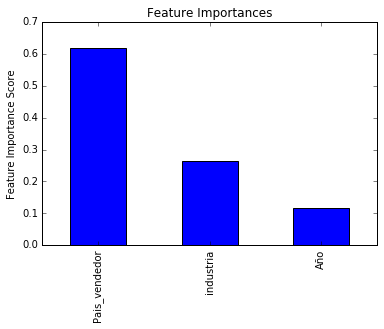

In [24]:
#crear modelo y mandar llamar funcion para modelado(random forest)
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para random forest funciono mejor el tipo 3
            
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Cross mean_squared_error : 3.34e+17
Cross error de la suma total de todas las predicciones : 0.009544
Cross error del monto de cada prediccion(35) : 0.1534

Model Report
Test mean_squared_error : 5.575e+17
Test error de la suma total de todas las predicciones : 0.08626
Test error del monto de cada prediccion(35) : 0.139


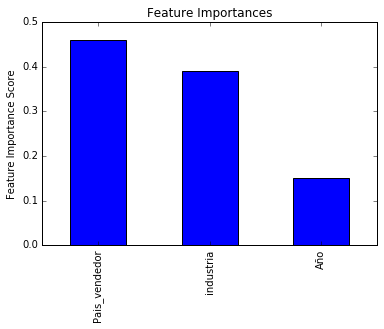

In [27]:
#crear modelo y mandar llamar funcion para modelado Gradient boosted trees:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para boosted trees funcionó mejor el tipo 3
            
gbm0 = GradientBoostingRegressor(loss='ls',random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

In [32]:
#funcion para modelar regresiones con penalización L1(lasso) y L2(ridge):

def regresiones(datos,tipo,Alpha):
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año==16').reset_index(drop=True) #año 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    #entrenar modelos con training data set
    Lasso_reg= Lasso(alpha=Alpha,normalize=True).fit(X_train,Y_train)#alpha :Constant that multiplies the L1 term. Defaults to 1.0
    Ridge_reg= Ridge(alpha=Alpha,normalize=True,solver='auto').fit(X_train,Y_train)#alpha :Regularization strength; must be a positive float. 
    #Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
        
    # hacer predicciones de cross-validation data set
    
    Yg_lasso=Lasso_reg.predict(X_cross)
    Yg_lasso[Yg_lasso<0]=0
    Yg_ridge=Ridge_reg.predict(X_cross)
    Yg_ridge[Yg_ridge<0]=0
    
    #errores personalizados para Cross set Lasso:
    pd_dcross_predictions=pd.DataFrame(Yg_lasso)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_lasso)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Ridge:
    pd_dcross_predictions=pd.DataFrame(Yg_ridge)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_ridge)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    
    print('\t Alpha %1.3f' %Alpha)
    print ("Cross R2(coefficient of determination) Lasso : %.4g" % r2_score(Y_cross.values,Yg_lasso))
    print ("Cross mean square error Lasso: %.4g" % mean_squared_error(Y_cross.values,Yg_lasso))
    print ("Cross error de la suma total de todas las predicciones Lasso: %.4g" %porcentaje_error_cross0)
    print ("Cross error del monto de cada prediccion(35) Lasso: %.4g" %porcentaje_error_abs_cross0)
    print ("Cross R2(coefficient of determination) Ridge: %.4g" % r2_score(Y_cross.values,Yg_ridge))
    print ("Cross mean square error Ridge: %.4g" % mean_squared_error(Y_cross.values,Yg_ridge))
    print ("Cross error de la suma total de todas las predicciones Ridge: %.4g" %porcentaje_error_cross1)
    print ("Cross error del monto de cada prediccion(35) Ridge: %.4g" %porcentaje_error_abs_cross1)
 
    # hacer predicciones de test data set::
    
    ########### predicciones con regresion Lasso : #################
    
    #Predict test set:  
 
    resultados_lasso=Lasso_reg.predict(X_test)
    resultados_lasso[resultados_lasso<0]=0
    
    #errores personalizados para test set Lasso:
    pd_dcross_predictions=pd.DataFrame(resultados_lasso)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lasso)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Lasso")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Lasso : %.4g" % r2_score(Y_test.values,resultados_lasso))
    print ("Test mean_squared_error Lasso: %.4g" % mean_squared_error(Y_test.values,resultados_lasso))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con regresion Ridge:#################
    
    #Predict test set:  
 
    resultados_ridge=Ridge_reg.predict(X_test)
    resultados_ridge[resultados_ridge<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_ridge)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_ridge)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Ridge")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test R2(coefficient of determination) Ridge : %.4g" % r2_score(Y_test.values,resultados_ridge))
    print ("Test mean_squared_error Ridge: %.4g" % mean_squared_error(Y_test.values,resultados_ridge))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
                
    ###hacer data frame con los resultados de los 2 tipos de penalización:
    
    resu_cross=pd.DataFrame(np.zeros((len(Yg_lasso),2)),columns=['Lasso','Ridge'])
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_lasso),2)),columns=['Lasso','Ridge'])
    
    resu_cross.loc[:,'Lasso']=Yg_lasso
    resu_cross.loc[:,'Ridge']=Yg_ridge
    
    resultados_fun.loc[:,'Lasso']=resultados_lasso
    resultados_fun.loc[:,'Ridge']=resultados_ridge
    
    return   resu_cross,resultados_fun

In [39]:
#mandar llamar funcion para modelar regresiones:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #no tuvieron buenos resultados

#for Alpha in range(1,11):
#    regresiones(data_mof_tipo1,tipo,Alpha)
       
Alpha=1
resu_cross,resultados_fun=regresiones(data_mof_tipo3,tipo,Alpha) 


Model Report
	 Alpha 1.000
Cross R2(coefficient of determination) Lasso : 0.4166
Cross mean square error Lasso: 1.257e+19
Cross error de la suma total de todas las predicciones Lasso: 0.1712
Cross error del monto de cada prediccion(35) Lasso: 1.264
Cross R2(coefficient of determination) Ridge: 0.2595
Cross mean square error Ridge: 1.595e+19
Cross error de la suma total de todas las predicciones Ridge: 0.1122
Cross error del monto de cada prediccion(35) Ridge: 1.3

Model Report Lasso
	 alpha: 1.000
Test R2(coefficient of determination) Lasso : 0.4019
Test mean_squared_error Lasso: 1.528e+19
Test error de la suma total de todas las predicciones : 0.09444
Test error del monto de cada prediccion(35) : 1.241

Model Report Ridge
	 alpha: 1.000
Test R2(coefficient of determination) Ridge : 0.2422
Test mean_squared_error Ridge: 1.936e+19
Test error de la suma total de todas las predicciones : 0.1703
Test error del monto de cada prediccion(35) : 1.269


In [40]:
#funcion para modelar Regresion Kernel Ridge:
def kernel_ridge(datos,tipo,Alpha,pol_degree,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<16').reset_index(drop=True) #desde año 1 hasta 15
    data_cross=datos.query('Año==16').reset_index(drop=True) #año 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,13:14]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_cross=data_cross.iloc[:,3:4]
        X_cross=data_cross.ix[:, data_cross.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
    
    X_cross=scaler.transform(X_cross) #normalizar cross set
    X_cross=pd.DataFrame(X_cross,columns=columns_names) #convertir de array a DataFrame
    
    X_test=scaler.transform(X_test) #normalizar test set
    X_test=pd.DataFrame(X_test,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    Kridge_linear = KernelRidge(kernel='linear',alpha=Alpha).fit(X_train,Y_train)#Small positive values of alpha improve the conditioning 
    #of the problem and reduce the variance of the estimates
    Kridge_poly = KernelRidge(kernel='poly',degree=pol_degree,alpha=Alpha,gamma=g).fit(X_train,Y_train) 
    Kridge_rbf = KernelRidge(kernel='rbf',alpha=Alpha,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    Kridge_laplacian= KernelRidge(kernel='laplacian',alpha=Alpha,gamma=g).fit(X_train,Y_train) # "C" is the penalization for error term
    # hacer predicciones de cross-validation data set
    
    Yg_linear=Kridge_linear.predict(X_cross)
    Yg_poly=Kridge_poly.predict(X_cross)
    Yg_rbf=Kridge_rbf.predict(X_cross)
    Yg_lapla=Kridge_laplacian.predict(X_cross)
    
    #errores personalizados para Cross set Linear:
    pd_dcross_predictions=pd.DataFrame(Yg_linear)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_linear)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Polynomial:
    pd_dcross_predictions=pd.DataFrame(Yg_poly)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_poly)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set RBF:
    pd_dcross_predictions=pd.DataFrame(Yg_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_rbf)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #errores personalizados para Cross set Laplacian:
    pd_dcross_predictions=pd.DataFrame(Yg_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_cross.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(Yg_lapla)
    sum_reales=sum(Y_cross.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_cross3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_cross3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Cross mean_squared_error Linear kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_linear))
    print ("Cross R2 Linear kernel: %.4g" % r2_score(Y_cross.values,Yg_linear))
    print ("Cross error de la suma total de todas las predicciones Linear kernel: %.4g" %porcentaje_error_cross0)
    print ("Cross error del monto de cada prediccion(35) Linear kernel: %.4g" %porcentaje_error_abs_cross0)
    print ("Cross mean_squared_error Polynomial kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_poly))
    print ("Cross R2 Polynomial kernel: %.4g" % r2_score(Y_cross.values,Yg_poly))
    print ("Cross error de la suma total de todas las predicciones Polynomial kernel: %.4g" %porcentaje_error_cross1)
    print ("Cross error del monto de cada prediccion(35) Polynomial kernel: %.4g" %porcentaje_error_abs_cross1)
    print ("Cross mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_rbf))
    print ("Cross R2 Radial Kernel: %.4g" % r2_score(Y_cross.values,Yg_rbf))
    print ("Cross error de la suma total de todas las predicciones Radial kernel: %.4g" %porcentaje_error_cross2)
    print ("Cross error del monto de cada prediccion(35) Radial kernel: %.4g" %porcentaje_error_abs_cross2)
    print ("Cross mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_cross.values,Yg_lapla))
    print ("Cross R2 Laplacian Kernel: %.4g" % r2_score(Y_cross.values,Yg_lapla))
    print ("Cross error de la suma total de todas las predicciones Laplacian kernel: %.4g" %porcentaje_error_cross3)
    print ("Cross error del monto de cada prediccion(35) Laplacian kernel: %.4g" %porcentaje_error_abs_cross3)
 
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  
 
    resultados_lineal=Kridge_linear.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lineal)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  
 
    resultados_poly=Kridge_poly.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_poly)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t Gamma: %1.3f' %g)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
     
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set: 
 
    resultados_rbf=Kridge_rbf.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test2)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test2)
     
    ########### predicciones con kernel Laplacian:#################
    
    #Predict test set: 
 
    resultados_lapla=Kridge_laplacian.predict(X_test)
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lapla)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Laplacian Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lapla))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test3)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test3)
            
    ###hacer data frame con los resultados de los 4 tipos de kernels:
    
    resu_cross=pd.DataFrame(np.zeros((len(Yg_linear),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
    
    resu_cross.loc[:,'Linear']=Yg_linear
    resu_cross.loc[:,'Polynomial']=Yg_poly
    resu_cross.loc[:,'Radial']=Yg_rbf
    resu_cross.loc[:,'Laplacian']=Yg_lapla
    
    resultados_fun.loc[:,'Linear']=resultados_lineal
    resultados_fun.loc[:,'Polynomial']=resultados_poly
    resultados_fun.loc[:,'Radial']=resultados_rbf
    resultados_fun.loc[:,'Laplacian']=resultados_lapla
    
    return   resu_cross,resultados_fun

In [48]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

#definir funciones para pasos :
def frange(x, y, jump):
  while x <= y:
    yield x
    x *= jump
    
def frange2(x, y, jump):
  while x >= y:
    yield x
    x /= jump
    
tipo=3 #el mejor fue el tipo 3
for pol_degree in range(4,5):
    for Alpha in frange(1,10,2):
        for g in frange2(2,.002,10):
            kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)
        
#Alpha=1
#pol_degree=5
#g=.2
#resu_cross,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report
	 Grado polinomio 4.000
	 Alpha: 1.000
	 gamma: 2.000
Cross mean_squared_error Linear kernel: 1.312e+19
Cross R2 Linear kernel: 0.3907
Cross error de la suma total de todas las predicciones Linear kernel: 0.5385
Cross error del monto de cada prediccion(35) Linear kernel: 1.384
Cross mean_squared_error Polynomial kernel: 5.987e+17
Cross R2 Polynomial kernel: 0.9722
Cross error de la suma total de todas las predicciones Polynomial kernel: 0.0301
Cross error del monto de cada prediccion(35) Polynomial kernel: 0.3198
Cross mean_squared_error Radial Kernel: 5.126e+18
Cross R2 Radial Kernel: 0.762
Cross error de la suma total de todas las predicciones Radial kernel: 0.4289
Cross error del monto de cada prediccion(35) Radial kernel: 0.4504
Cross mean_squared_error Laplacian Kernel: 7.321e+18
Cross R2 Laplacian Kernel: 0.6601
Cross error de la suma total de todas las predicciones Laplacian kernel: 0.5283
Cross error del monto de cada prediccion(35) Laplacian kernel: 0.5492

Model

In [54]:
#mandar llamar funcion para modelado con regresión Kernel Ridge:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #el mejor fue el tipo 3

Alpha=4
pol_degree=4
g=.2
resu_cross,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report
	 Grado polinomio 4.000
	 Alpha: 4.000
	 gamma: 0.200
Cross mean_squared_error Linear kernel: 1.315e+19
Cross R2 Linear kernel: 0.3893
Cross error de la suma total de todas las predicciones Linear kernel: 0.5411
Cross error del monto de cada prediccion(35) Linear kernel: 1.381
Cross mean_squared_error Polynomial kernel: 7.301e+17
Cross R2 Polynomial kernel: 0.9661
Cross error de la suma total de todas las predicciones Polynomial kernel: 0.05796
Cross error del monto de cada prediccion(35) Polynomial kernel: 0.2367
Cross mean_squared_error Radial Kernel: 4.899e+18
Cross R2 Radial Kernel: 0.7725
Cross error de la suma total de todas las predicciones Radial kernel: 0.2319
Cross error del monto de cada prediccion(35) Radial kernel: 0.585
Cross mean_squared_error Laplacian Kernel: 6.795e+18
Cross R2 Laplacian Kernel: 0.6845
Cross error de la suma total de todas las predicciones Laplacian kernel: 0.1681
Cross error del monto de cada prediccion(35) Laplacian kernel: 0.8032

Mode